# Leves | Modelo Fast | ML

Autor: Felipe Oliveira

------------

## Objetivo
Este notebook objetiva a testagem de modelos de machine learning e conseguinte comparação frente ao modelo de regressão logística vigente para o público de clientes

março de 2022

# Pacotes

In [0]:
!pip install shap
!pip install lightgbm
!pip install xgboost

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from pyspark.sql.functions import *
from pyspark.sql.functions import expr
from pyspark.sql.types import ByteType,ShortType,LongType,IntegerType,DoubleType
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
import statsmodels.api as sm

# Classes

In [0]:
%run /Users/felipe.espirito@bv.com.br/Modulos

# Funções

In [0]:
%run /Users/lucas.lima@bv.com.br/funcoes/funcoes_lucas

In [0]:
%run /Users/felipe.espirito@bv.com.br/funcoes

# Dados

In [0]:
%sql 
refresh table cred_lucaslima.levesfast_escorada_cli;
select * from cred_lucaslima.levesfast_escorada_cli limit 10;

NuProposta,NuCpfCnpj,DtPrimeiroCadastro,QtMesesEmprego,DsEstadoCivil,CdUfCliente,CPF_main,Safra_main,P3_ult_ret,P4_BVS,SCORE_HRIM,SCORE_HSPN,SCORE_HVLD,QuodScore_v2,score_ajust,inad30,elegiveis,QuodScore,Blend_Novo_1_1_arred,RUPD,ScoreBacen,WoE_score_ajust,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,WoE_Int_Internas1,Int_Internas1,WoE_QtDiasAtrasoMaxCtol1_C,QtDiasAtrasoMaxCtol1_C,WoE_PP_PD_VPG01_PF_C,PP_PD_VPG01_PF_C,WoE_QtAtrasoMed_Cpf_C,QtAtrasoMed_Cpf_C,WoE_PP_PD_CPG01_PF_C,PP_PD_CPG01_PF_C,WoE_QtAtrasoMax_Cpf_C,QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,QtDiasAtrasoMinCtol1_C,WoE_PP_HA_AMP01_PF_C,PP_HA_AMP01_PF,WoE_GC_AV_GRV01_PF_C,GC_AV_GRV01_PF,WoE_PF_CP_VOL04_PF_C,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,WoE_PP_AV_GRV04_PF_C,PP_AV_GRV04_PF,WoE_PP_HA_AMP02_PF_C,PP_HA_AMP02_PF,WoE_PF_CP_VOL02_PF_C,PF_CP_VOL02_PF,WoE_PF_CP_VOL01_PF_C,PF_CP_VOL01_PF,WoE_PP_PD_CPG02_PF_C,PP_PD_CPG02_PF,WoE_PF_CP_VOL03_PF_C,PF_CP_VOL03_PF,WoE_PP_AV_AMP02_PF_C,PP_AV_AMP02_PF,WoE_PP_HA_VLR02_PF_C,PP_HA_VLR02_PF,WoE_PP_AV_GRV02_PF_C,PP_AV_GRV02_PF,WoE_PF_PC_CPR02_PF_C,PF_PC_CPR02_PF,WoE_RM_PR_MOD04_PF_C,RM_PR_MOD04_PF,yhat1,yhat1_2,yhat1_3,yhat1_4,yhat1_5,logito_CRISP,logito_yhat1_4,yhat_blend,yhat_blend2,yhat_rf1_1,qsyhat1,qsyhat1_2,qsyhat1_3,qsyhat1_4,qsyhat1_5,qsyhat_rf1_1,qsyhat_blend,qsyhat_blend2,qsP3_ult_ret,qsP4_BVS,qsSCORE_HSPN,qsSCORE_HVLD,qsQuodScore_v2,qsQuodScore,qsBlend_Novo_1_1_arred,prob,prob90m12
371809887,59335114049,25/01/2005,148,CASADO,RS,59335114049,202109,677.0,546.0,674.0,674.0,987.0,766,796.0,0,1,751.0,990.0,8.5,981.0,0.302223,0.0,0.2222222222,2.0,-9.9999999E7,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.352094,1,-0.110795,3,0.114977,1,0.047749,46.21,-0.074026,22.25,0.377749,1,99.96,0.210222,0.0,0.036937,90.51,0.275167,99.89,0.030219,8.97,0.238348,97.8,0.311529,93.37,0.219652,0.0,0.022807,16.17,0.208731,0.0,0.249027,100.0,0.135206,91.67,983.1840971221311,987.9433124192875,991.0830497285433,989.0074081237948,982.3474417954187,4.59511985013459,4.499480241995284,990.1600405038525,991.094721653274,982.5330137952201,4.0,6.0,7.0,6.0,4.0,5,7.0,7.0,0.0,5.0,3.0,7.0,2,2.0,7.0,0.009839959496147466,0.03635736079591689
243497793,60391693972,07/05/2001,24,CASADO,PR,60391693972,202109,832.0,656.0,4.0,830.0,996.0,881,597.0,0,1,768.0,996.0,9.5,992.0,-0.147677,0.0,0.4375,5.0,-9.9999999E7,0.084284,2,-1.57E-4,2,-0.696138,4,-0.260612,3,0.352094,1,-0.505355,5,0.114977,1,-0.189917,70.39,0.274077,0.0,0.377749,1,99.15,0.210222,0.0,0.036937,63.51,0.275167,99.11,0.030219,15.09,0.238348,99.7,0.311529,98.78,0.219652,0.0,0.224565,0.0,0.208731,0.0,0.249027,100.0,0.135206,91.67,989.0249440212453,990.1658203016576,982.5076048122393,990.416961915669,976.5014933600704,5.517452896464707,4.6381313586029975,992.8123479592138,993.1949598429632,988.4579510693482,6.0,7.0,4.0,7.0,3.0,7,8.0,8.0,7.0,8.0,6.0,9.0,5,2.0,9.0,0.007187652040786197,0.02850861471780708
711284595,64023729787,07/10/2016,120,VIUVO,RJ,64023729787,202109,847.0,494.0,712.0,712.0,978.0,964,773.0,1,1,855.0,985.0,8.25,-9.9999999E7,0.174634,0.0,0.0,0.0,-9.9999999E7,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.043678,2,0.211916,2,0.114977,1,0.047749,24.49,0.274077,7.14,0.377749,1,99.76,0.210222,0.0,0.036937,50.05,0.275167,99.99,0.284493,34.22,0.238348,99.05,0.311529,99.94,0.219652,0.0,-0.358585,98.0,0.208731,0.0,0.249027,100.0,0.135206,91.67,984.5443116056454,986.3378526678829,985.9464288886153,988.4376189922115,991.3314676198484,4.1845914400698785,4.448368722316815,988.7773854761438,989.5393210725732,985.7252743308636,5.0,5.0,5.0,6.0,8.0,6,6.0,7.0,8.0,3.0,4.0,5.0,8,6.0,6.0,0.0112226145238562,0.040421146479068026
271595457,64970345953,07/01/2020,36,CASADO,SC,64970345953,202109,864.0,614.0,685.0,685.0,974.0,882,784.0,0,1,823.0,987.0,8.25,-9.9999999E7,0.302223,0.0,0.25,6.0,-9.9999999E7,0.084284,2,-1.57E-4,2,0.398254,1,0.313914,1,0.352094,1,0.211916,2,0.114977,1,0.396509,0.0,0.274077,0.0,-0.239079,3,304.0,0.210222,0.0,0.343908,0.0,-0.379273,0.0,-0.379273,0.0,-0.374953,3

cria_fxs(nbase1,nbase2,nvar,n_fxs,nova_var) | última atualização 08/03/2022

calc_IV(nbase1,nvar_fx,ntarget) | última atualização 11/03/2022

In [0]:
base_cli=spark.sql('''
  select * from cred_lucaslima.levesfast_escorada_cli
  ''')
print('Base Clientes: ', base_cli.count())

Base Clientes: 144330

aplicaRUPD(nbase,nvar) | Última atualização: 30/03/2022

encontra_modelo(X, y, classificador, n_divisoes, n_repeticoes,hiperparams = None, scoring="accuracy", random_state=1109) 
 Última atualização: 21/03/2022

In [0]:
base_cli_pd=base_cli.toPandas()

In [0]:
base_cli_pd

,NuProposta,NuCpfCnpj,DtPrimeiroCadastro,QtMesesEmprego,DsEstadoCivil,CdUfCliente,CPF_main,Safra_main,P3_ult_ret,P4_BVS,SCORE_HRIM,SCORE_HSPN,SCORE_HVLD,QuodScore_v2,score_ajust,inad30,elegiveis,QuodScore,Blend_Novo_1_1_arred,RUPD,ScoreBacen,WoE_score_ajust,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,WoE_Int_Internas1,Int_Internas1,WoE_QtDiasAtrasoMaxCtol1_C,QtDiasAtrasoMaxCtol1_C,WoE_PP_PD_VPG01_PF_C,PP_PD_VPG01_PF_C,WoE_QtAtrasoMed_Cpf_C,QtAtrasoMed_Cpf_C,WoE_PP_PD_CPG01_PF_C,PP_PD_CPG01_PF_C,WoE_QtAtrasoMax_Cpf_C,QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,QtDiasAtrasoMinCtol1_C,WoE_PP_HA_AMP01_PF_C,PP_HA_AMP01_PF,WoE_GC_AV_GRV01_PF_C,GC_AV_GRV01_PF,WoE_PF_CP_VOL04_PF_C,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,WoE_PP_AV_GRV04_PF_C,PP_AV_GRV04_PF,WoE_PP_HA_AMP02_PF_C,PP_HA_AMP02_PF,WoE_PF_CP_VOL02_PF_C,PF_CP_VOL02_PF,WoE_PF_CP_VOL01_PF_C,PF_CP_VOL01_PF,WoE_PP_PD_CPG02_PF_C,PP_PD_CPG02_PF,WoE_PF_CP_VOL03_PF_C,PF_CP_VOL03_PF,WoE_PP_AV_AMP02_PF_C,PP_AV_AMP02_PF,WoE_PP_HA_VLR02_PF_C,PP_HA_VLR02_PF,WoE_PP_AV_GRV02_PF_C,PP_AV_GRV02_PF,WoE_PF_PC_CPR02_PF_C,PF_PC_CPR02_PF,WoE_RM_PR_MOD04_PF_C,RM_PR_MOD04_PF,yhat1,yhat1_2,yhat1_3,yhat1_4,yhat1_5,logito_CRISP,logito_yhat1_4,yhat_blend,yhat_blend2,yhat_rf1_1,qsyhat1,qsyhat1_2,qsyhat1_3,qsyhat1_4,qsyhat1_5,qsyhat_rf1_1,qsyhat_blend,qsyhat_blend2,qsP3_ult_ret,qsP4_BVS,qsSCORE_HSPN,qsSCORE_HVLD,qsQuodScore_v2,qsQuodScore,qsBlend_Novo_1_1_arred,prob,prob90m12
0,371809887,59335114049,25/01/2005,148,CASADO,RS,59335114049,202109,677.0,546.0,674.0,674.0,987.0,766,796.0,0,1,751.0,990.0,8.50,981.0,0.302223,0.0,2.222222e-01,2.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.352094,1,-0.110795,3,0.114977,1,0.047749,46.21,-0.074026,22.25,0.377749,1,99.96,0.210222,0.00,0.036937,90.51,0.275167,99.89,0.030219,8.97,0.238348,97.80,0.311529,93.37,0.219652,0.00,0.022807,16.17,0.208731,0.00,0.249027,100.00,0.135206,91.67,983.184097,987.943312,991.083050,989.007408,982.347442,4.595120,4.499480,990.160041,991.094722,982.533014,4.0,6.0,7.0,6.0,4.0,5,7.0,7.0,0.0,5.0,3.0,7.0,2,2.0,7.0,0.009840,0.036357
1,243497793,60391693972,07/05/2001,24,CASADO,PR,60391693972,202109,832.0,656.0,4.0,830.0,996.0,881,597.0,0,1,768.0,996.0,9.50,992.0,-0.147677,0.0,4.375000e-01,5.0,-99999999.0,0.084284,2,-0.000157,2,-0.696138,4,-0.260612,3,0.352094,1,-0.505355,5,0.114977,1,-0.189917,70.39,0.274077,0.00,0.377749,1,99.15,0.210222,0.00,0.036937,63.51,0.275167,99.11,0.030219,15.09,0.238348,99.70,0.311529,98.78,0.219652,0.00,0.224565,0.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,989.024944,990.165820,982.507605,990.416962,976.501493,5.517453,4.638131,992.812348,993.194960,988.457951,6.0,7.0,4.0,7.0,3.0,7,8.0,8.0,7.0,8.0,6.0,9.0,5,2.0,9.0,0.007188,0.028509
2,711284595,64023729787,07/10/2016,120,VIUVO,RJ,64023729787,202109,847.0,494.0,712.0,712.0,978.0,964,773.0,1,1,855.0,985.0,8.25,-99999999.0,0.174634,0.0,0.000000e+00,0.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.043678,2,0.211916,2,0.114977,1,0.047749,24.49,0.274077,7.14,0.377749,1,99.76,0.210222,0.00,0.036937,50.05,0.275167,99.99,0.284493,34.22,0.238348,99.05,0.311529,99.94,0.219652,0.00,-0.358585,98.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,984.544312,986.337853,985.946429,988.437619,991.331468,4.184591,4.448369,988.777385,989.539321,985.725274,5.0,5.0,5.0,6.0,8.0,6,6.0,7.0,8.0,3.0,4.0,5.0,8,6.0,6.0,0.011223,0.040421
3,271595457,64970345953,07/01/2020,36,CASADO,SC,64970345953,202109,864.0,614.0,685.0,685.0,974.0,882,784.0,0,1,823.0,987.0,8.25,-99999999.0,0.302223,0.0,2.500000e-01,6.0,-99999999.0,0.084284,2,-0.000157,2,0.398254,1,0.313914,1,0.352094,1,0.211916,2,0.114977,1,0.396509,0.00,0.274077,0.00,-0.239079,3,304.00,0.210222,0.00,0.343908,0.00,-0.379273,0.00,-0.379273,0.00,-0.374953,304.00,-0.246304,304.00,0.219652,0.00,0.224565,304.00,0.208731,0.00,-0.038755,74.02,0.280347,304.00,985.921829,986.778597,984.665089,985.691144,986.824230,4.329721,4.232464,987.212979,987.300838,985.127323,5.0,6.0,5.0,5.0,6.0,6,6.0,6.0,

# Conversões

In [0]:
base_cli_pd["Safra_main"] = pd.to_datetime(base_cli_pd["Safra_main"].astype(str), format='%Y%m')

# Categorização das variáveis

A categorização das variáveis (com exceção dos scores) foi feita apenas para o público não cliente.
O Rémi está fazendo para os clientes.

In [0]:
base_cli_pd

,NuProposta,NuCpfCnpj,DtPrimeiroCadastro,QtMesesEmprego,DsEstadoCivil,CdUfCliente,CPF_main,Safra_main,P3_ult_ret,P4_BVS,SCORE_HRIM,SCORE_HSPN,SCORE_HVLD,QuodScore_v2,score_ajust,inad30,elegiveis,QuodScore,Blend_Novo_1_1_arred,RUPD,ScoreBacen,WoE_score_ajust,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,WoE_Int_Internas1,Int_Internas1,WoE_QtDiasAtrasoMaxCtol1_C,QtDiasAtrasoMaxCtol1_C,WoE_PP_PD_VPG01_PF_C,PP_PD_VPG01_PF_C,WoE_QtAtrasoMed_Cpf_C,QtAtrasoMed_Cpf_C,WoE_PP_PD_CPG01_PF_C,PP_PD_CPG01_PF_C,WoE_QtAtrasoMax_Cpf_C,QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,QtDiasAtrasoMinCtol1_C,WoE_PP_HA_AMP01_PF_C,PP_HA_AMP01_PF,WoE_GC_AV_GRV01_PF_C,GC_AV_GRV01_PF,WoE_PF_CP_VOL04_PF_C,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,WoE_PP_AV_GRV04_PF_C,PP_AV_GRV04_PF,WoE_PP_HA_AMP02_PF_C,PP_HA_AMP02_PF,WoE_PF_CP_VOL02_PF_C,PF_CP_VOL02_PF,WoE_PF_CP_VOL01_PF_C,PF_CP_VOL01_PF,WoE_PP_PD_CPG02_PF_C,PP_PD_CPG02_PF,WoE_PF_CP_VOL03_PF_C,PF_CP_VOL03_PF,WoE_PP_AV_AMP02_PF_C,PP_AV_AMP02_PF,WoE_PP_HA_VLR02_PF_C,PP_HA_VLR02_PF,WoE_PP_AV_GRV02_PF_C,PP_AV_GRV02_PF,WoE_PF_PC_CPR02_PF_C,PF_PC_CPR02_PF,WoE_RM_PR_MOD04_PF_C,RM_PR_MOD04_PF,yhat1,yhat1_2,yhat1_3,yhat1_4,yhat1_5,logito_CRISP,logito_yhat1_4,yhat_blend,yhat_blend2,yhat_rf1_1,qsyhat1,qsyhat1_2,qsyhat1_3,qsyhat1_4,qsyhat1_5,qsyhat_rf1_1,qsyhat_blend,qsyhat_blend2,qsP3_ult_ret,qsP4_BVS,qsSCORE_HSPN,qsSCORE_HVLD,qsQuodScore_v2,qsQuodScore,qsBlend_Novo_1_1_arred,prob,prob90m12
0,371809887,59335114049,25/01/2005,148,CASADO,RS,59335114049,2021-09-01,677.0,546.0,674.0,674.0,987.0,766,796.0,0,1,751.0,990.0,8.50,981.0,0.302223,0.0,2.222222e-01,2.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.352094,1,-0.110795,3,0.114977,1,0.047749,46.21,-0.074026,22.25,0.377749,1,99.96,0.210222,0.00,0.036937,90.51,0.275167,99.89,0.030219,8.97,0.238348,97.80,0.311529,93.37,0.219652,0.00,0.022807,16.17,0.208731,0.00,0.249027,100.00,0.135206,91.67,983.184097,987.943312,991.083050,989.007408,982.347442,4.595120,4.499480,990.160041,991.094722,982.533014,4.0,6.0,7.0,6.0,4.0,5,7.0,7.0,0.0,5.0,3.0,7.0,2,2.0,7.0,0.009840,0.036357
1,243497793,60391693972,07/05/2001,24,CASADO,PR,60391693972,2021-09-01,832.0,656.0,4.0,830.0,996.0,881,597.0,0,1,768.0,996.0,9.50,992.0,-0.147677,0.0,4.375000e-01,5.0,-99999999.0,0.084284,2,-0.000157,2,-0.696138,4,-0.260612,3,0.352094,1,-0.505355,5,0.114977,1,-0.189917,70.39,0.274077,0.00,0.377749,1,99.15,0.210222,0.00,0.036937,63.51,0.275167,99.11,0.030219,15.09,0.238348,99.70,0.311529,98.78,0.219652,0.00,0.224565,0.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,989.024944,990.165820,982.507605,990.416962,976.501493,5.517453,4.638131,992.812348,993.194960,988.457951,6.0,7.0,4.0,7.0,3.0,7,8.0,8.0,7.0,8.0,6.0,9.0,5,2.0,9.0,0.007188,0.028509
2,711284595,64023729787,07/10/2016,120,VIUVO,RJ,64023729787,2021-09-01,847.0,494.0,712.0,712.0,978.0,964,773.0,1,1,855.0,985.0,8.25,-99999999.0,0.174634,0.0,0.000000e+00,0.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.043678,2,0.211916,2,0.114977,1,0.047749,24.49,0.274077,7.14,0.377749,1,99.76,0.210222,0.00,0.036937,50.05,0.275167,99.99,0.284493,34.22,0.238348,99.05,0.311529,99.94,0.219652,0.00,-0.358585,98.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,984.544312,986.337853,985.946429,988.437619,991.331468,4.184591,4.448369,988.777385,989.539321,985.725274,5.0,5.0,5.0,6.0,8.0,6,6.0,7.0,8.0,3.0,4.0,5.0,8,6.0,6.0,0.011223,0.040421
3,271595457,64970345953,07/01/2020,36,CASADO,SC,64970345953,2021-09-01,864.0,614.0,685.0,685.0,974.0,882,784.0,0,1,823.0,987.0,8.25,-99999999.0,0.302223,0.0,2.500000e-01,6.0,-99999999.0,0.084284,2,-0.000157,2,0.398254,1,0.313914,1,0.352094,1,0.211916,2,0.114977,1,0.396509,0.00,0.274077,0.00,-0.239079,3,304.00,0.210222,0.00,0.343908,0.00,-0.379273,0.00,-0.379273,0.00,-0.374953,304.00,-0.246304,304.00,0.219652,0.00,0.224565,304.00,0.208731,0.00,-0.038755,74.02,0.280347,304.00,985.921829,986.778597,984.665089,985.691144,986.824230,4.329721,4.232464,987.212979,987.300838,985.127323,5.0,6.0,5.0,5.

In [0]:
base_cli_cat=base_cli_pd[(base_cli_pd.Safra_main < "2021-11") & (base_cli_pd.elegiveis==1)]
base_cli_cat=base_cli_cat.fillna(-99999999)
base_cli_cat.head()

,NuProposta,NuCpfCnpj,DtPrimeiroCadastro,QtMesesEmprego,DsEstadoCivil,CdUfCliente,CPF_main,Safra_main,P3_ult_ret,P4_BVS,SCORE_HRIM,SCORE_HSPN,SCORE_HVLD,QuodScore_v2,score_ajust,inad30,elegiveis,QuodScore,Blend_Novo_1_1_arred,RUPD,ScoreBacen,WoE_score_ajust,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,WoE_Int_Internas1,Int_Internas1,WoE_QtDiasAtrasoMaxCtol1_C,QtDiasAtrasoMaxCtol1_C,WoE_PP_PD_VPG01_PF_C,PP_PD_VPG01_PF_C,WoE_QtAtrasoMed_Cpf_C,QtAtrasoMed_Cpf_C,WoE_PP_PD_CPG01_PF_C,PP_PD_CPG01_PF_C,WoE_QtAtrasoMax_Cpf_C,QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,QtDiasAtrasoMinCtol1_C,WoE_PP_HA_AMP01_PF_C,PP_HA_AMP01_PF,WoE_GC_AV_GRV01_PF_C,GC_AV_GRV01_PF,WoE_PF_CP_VOL04_PF_C,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,WoE_PP_AV_GRV04_PF_C,PP_AV_GRV04_PF,WoE_PP_HA_AMP02_PF_C,PP_HA_AMP02_PF,WoE_PF_CP_VOL02_PF_C,PF_CP_VOL02_PF,WoE_PF_CP_VOL01_PF_C,PF_CP_VOL01_PF,WoE_PP_PD_CPG02_PF_C,PP_PD_CPG02_PF,WoE_PF_CP_VOL03_PF_C,PF_CP_VOL03_PF,WoE_PP_AV_AMP02_PF_C,PP_AV_AMP02_PF,WoE_PP_HA_VLR02_PF_C,PP_HA_VLR02_PF,WoE_PP_AV_GRV02_PF_C,PP_AV_GRV02_PF,WoE_PF_PC_CPR02_PF_C,PF_PC_CPR02_PF,WoE_RM_PR_MOD04_PF_C,RM_PR_MOD04_PF,yhat1,yhat1_2,yhat1_3,yhat1_4,yhat1_5,logito_CRISP,logito_yhat1_4,yhat_blend,yhat_blend2,yhat_rf1_1,qsyhat1,qsyhat1_2,qsyhat1_3,qsyhat1_4,qsyhat1_5,qsyhat_rf1_1,qsyhat_blend,qsyhat_blend2,qsP3_ult_ret,qsP4_BVS,qsSCORE_HSPN,qsSCORE_HVLD,qsQuodScore_v2,qsQuodScore,qsBlend_Novo_1_1_arred,prob,prob90m12
0,371809887,59335114049,25/01/2005,148,CASADO,RS,59335114049,2021-09-01,677.0,546.0,674.0,674.0,987.0,766,796.0,0,1,751.0,990.0,8.50,981.0,0.302223,0.0,0.222222,2.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.352094,1,-0.110795,3,0.114977,1,0.047749,46.21,-0.074026,22.25,0.377749,1,99.96,0.210222,0.00,0.036937,90.51,0.275167,99.89,0.030219,8.97,0.238348,97.80,0.311529,93.37,0.219652,0.00,0.022807,16.17,0.208731,0.00,0.249027,100.00,0.135206,91.67,983.184097,987.943312,991.083050,989.007408,982.347442,4.595120,4.499480,990.160041,991.094722,982.533014,4.0,6.0,7.0,6.0,4.0,5,7.0,7.0,0.0,5.0,3.0,7.0,2,2.0,7.0,0.009840,0.036357
1,243497793,60391693972,07/05/2001,24,CASADO,PR,60391693972,2021-09-01,832.0,656.0,4.0,830.0,996.0,881,597.0,0,1,768.0,996.0,9.50,992.0,-0.147677,0.0,0.437500,5.0,-99999999.0,0.084284,2,-0.000157,2,-0.696138,4,-0.260612,3,0.352094,1,-0.505355,5,0.114977,1,-0.189917,70.39,0.274077,0.00,0.377749,1,99.15,0.210222,0.00,0.036937,63.51,0.275167,99.11,0.030219,15.09,0.238348,99.70,0.311529,98.78,0.219652,0.00,0.224565,0.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,989.024944,990.165820,982.507605,990.416962,976.501493,5.517453,4.638131,992.812348,993.194960,988.457951,6.0,7.0,4.0,7.0,3.0,7,8.0,8.0,7.0,8.0,6.0,9.0,5,2.0,9.0,0.007188,0.028509
2,711284595,64023729787,07/10/2016,120,VIUVO,RJ,64023729787,2021-09-01,847.0,494.0,712.0,712.0,978.0,964,773.0,1,1,855.0,985.0,8.25,-99999999.0,0.174634,0.0,0.000000,0.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.043678,2,0.211916,2,0.114977,1,0.047749,24.49,0.274077,7.14,0.377749,1,99.76,0.210222,0.00,0.036937,50.05,0.275167,99.99,0.284493,34.22,0.238348,99.05,0.311529,99.94,0.219652,0.00,-0.358585,98.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,984.544312,986.337853,985.946429,988.437619,991.331468,4.184591,4.448369,988.777385,989.539321,985.725274,5.0,5.0,5.0,6.0,8.0,6,6.0,7.0,8.0,3.0,4.0,5.0,8,6.0,6.0,0.011223,0.040421
3,271595457,64970345953,07/01/2020,36,CASADO,SC,64970345953,2021-09-01,864.0,614.0,685.0,685.0,974.0,882,784.0,0,1,823.0,987.0,8.25,-99999999.0,0.302223,0.0,0.250000,6.0,-99999999.0,0.084284,2,-0.000157,2,0.398254,1,0.313914,1,0.352094,1,0.211916,2,0.114977,1,0.396509,0.00,0.274077,0.00,-0.239079,3,304.00,0.210222,0.00,0.343908,0.00,-0.379273,0.00,-0.379273,0.00,-0.374953,304.00,-0.246304,304.00,0.219652,0.00,0.224565,304.00,0.208731,0.00,-0.038755,74.02,0.280347,304.00,985.921829,986.778597,984.665089,985.691144,986.824230,4.329721,4.232464,987.212979,987.300838,985.127323,5.0,6.0,5.0,5.0,6.0,6,6.0,6.0,

# Modelagem cliente

In [0]:
%run /Users/lucas.lima@bv.com.br/Leves/202202_LevesFast/LevesFast_WoE_cli

Filtros:

- mantém na base apenas quem não é missing nos scores 'P3_ult_ret', 'P4_BVS', 'SCORE_HRIM', 'SCORE_HVLD', 'QuodScore_v2', 'QuodScore';
- Elegiveis = 1;
- desenvolvimento in (202108,202109,202110).

In [0]:
base_cli_cat=base_cli_pd[(base_cli_pd.Safra_main < "2021-11") & (base_cli_pd.elegiveis==1)]
base_cli_cat=base_cli_cat.dropna(subset=['P3_ult_ret','P4_BVS','SCORE_HRIM',
                                           'SCORE_HVLD','QuodScore_v2','QuodScore'])

In [0]:
base_cli_cat.head()

,NuProposta,NuCpfCnpj,DtPrimeiroCadastro,QtMesesEmprego,DsEstadoCivil,CdUfCliente,CPF_main,Safra_main,P3_ult_ret,P4_BVS,SCORE_HRIM,SCORE_HSPN,SCORE_HVLD,QuodScore_v2,score_ajust,inad30,elegiveis,QuodScore,Blend_Novo_1_1_arred,RUPD,ScoreBacen,WoE_score_ajust,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,WoE_Int_Internas1,Int_Internas1,WoE_QtDiasAtrasoMaxCtol1_C,QtDiasAtrasoMaxCtol1_C,WoE_PP_PD_VPG01_PF_C,PP_PD_VPG01_PF_C,WoE_QtAtrasoMed_Cpf_C,QtAtrasoMed_Cpf_C,WoE_PP_PD_CPG01_PF_C,PP_PD_CPG01_PF_C,WoE_QtAtrasoMax_Cpf_C,QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,QtDiasAtrasoMinCtol1_C,WoE_PP_HA_AMP01_PF_C,PP_HA_AMP01_PF,WoE_GC_AV_GRV01_PF_C,GC_AV_GRV01_PF,WoE_PF_CP_VOL04_PF_C,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,WoE_PP_AV_GRV04_PF_C,PP_AV_GRV04_PF,WoE_PP_HA_AMP02_PF_C,PP_HA_AMP02_PF,WoE_PF_CP_VOL02_PF_C,PF_CP_VOL02_PF,WoE_PF_CP_VOL01_PF_C,PF_CP_VOL01_PF,WoE_PP_PD_CPG02_PF_C,PP_PD_CPG02_PF,WoE_PF_CP_VOL03_PF_C,PF_CP_VOL03_PF,WoE_PP_AV_AMP02_PF_C,PP_AV_AMP02_PF,WoE_PP_HA_VLR02_PF_C,PP_HA_VLR02_PF,WoE_PP_AV_GRV02_PF_C,PP_AV_GRV02_PF,WoE_PF_PC_CPR02_PF_C,PF_PC_CPR02_PF,WoE_RM_PR_MOD04_PF_C,RM_PR_MOD04_PF,yhat1,yhat1_2,yhat1_3,yhat1_4,yhat1_5,logito_CRISP,logito_yhat1_4,yhat_blend,yhat_blend2,yhat_rf1_1,qsyhat1,qsyhat1_2,qsyhat1_3,qsyhat1_4,qsyhat1_5,qsyhat_rf1_1,qsyhat_blend,qsyhat_blend2,qsP3_ult_ret,qsP4_BVS,qsSCORE_HSPN,qsSCORE_HVLD,qsQuodScore_v2,qsQuodScore,qsBlend_Novo_1_1_arred,prob,prob90m12
0,371809887,59335114049,25/01/2005,148,CASADO,RS,59335114049,2021-09-01,677.0,546.0,674.0,674.0,987.0,766,796.0,0,1,751.0,990.0,8.50,981.0,0.302223,0.0,0.222222,2.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.352094,1,-0.110795,3,0.114977,1,0.047749,46.21,-0.074026,22.25,0.377749,1,99.96,0.210222,0.00,0.036937,90.51,0.275167,99.89,0.030219,8.97,0.238348,97.80,0.311529,93.37,0.219652,0.00,0.022807,16.17,0.208731,0.00,0.249027,100.00,0.135206,91.67,983.184097,987.943312,991.083050,989.007408,982.347442,4.595120,4.499480,990.160041,991.094722,982.533014,4.0,6.0,7.0,6.0,4.0,5,7.0,7.0,0.0,5.0,3.0,7.0,2,2.0,7.0,0.009840,0.036357
1,243497793,60391693972,07/05/2001,24,CASADO,PR,60391693972,2021-09-01,832.0,656.0,4.0,830.0,996.0,881,597.0,0,1,768.0,996.0,9.50,992.0,-0.147677,0.0,0.437500,5.0,-99999999.0,0.084284,2,-0.000157,2,-0.696138,4,-0.260612,3,0.352094,1,-0.505355,5,0.114977,1,-0.189917,70.39,0.274077,0.00,0.377749,1,99.15,0.210222,0.00,0.036937,63.51,0.275167,99.11,0.030219,15.09,0.238348,99.70,0.311529,98.78,0.219652,0.00,0.224565,0.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,989.024944,990.165820,982.507605,990.416962,976.501493,5.517453,4.638131,992.812348,993.194960,988.457951,6.0,7.0,4.0,7.0,3.0,7,8.0,8.0,7.0,8.0,6.0,9.0,5,2.0,9.0,0.007188,0.028509
2,711284595,64023729787,07/10/2016,120,VIUVO,RJ,64023729787,2021-09-01,847.0,494.0,712.0,712.0,978.0,964,773.0,1,1,855.0,985.0,8.25,-99999999.0,0.174634,0.0,0.000000,0.0,-99999999.0,0.453493,1,0.420655,1,0.008917,2,0.313914,1,0.043678,2,0.211916,2,0.114977,1,0.047749,24.49,0.274077,7.14,0.377749,1,99.76,0.210222,0.00,0.036937,50.05,0.275167,99.99,0.284493,34.22,0.238348,99.05,0.311529,99.94,0.219652,0.00,-0.358585,98.00,0.208731,0.00,0.249027,100.00,0.135206,91.67,984.544312,986.337853,985.946429,988.437619,991.331468,4.184591,4.448369,988.777385,989.539321,985.725274,5.0,5.0,5.0,6.0,8.0,6,6.0,7.0,8.0,3.0,4.0,5.0,8,6.0,6.0,0.011223,0.040421
3,271595457,64970345953,07/01/2020,36,CASADO,SC,64970345953,2021-09-01,864.0,614.0,685.0,685.0,974.0,882,784.0,0,1,823.0,987.0,8.25,-99999999.0,0.302223,0.0,0.250000,6.0,-99999999.0,0.084284,2,-0.000157,2,0.398254,1,0.313914,1,0.352094,1,0.211916,2,0.114977,1,0.396509,0.00,0.274077,0.00,-0.239079,3,304.00,0.210222,0.00,0.343908,0.00,-0.379273,0.00,-0.379273,0.00,-0.374953,304.00,-0.246304,304.00,0.219652,0.00,0.224565,304.00,0.208731,0.00,-0.038755,74.02,0.280347,304.00,985.921829,986.778597,984.665089,985.691144,986.824230,4.329721,4.232464,987.212979,987.300838,985.127323,5.0,6.0,5.0,5.0,6.0,6,6.0,6.0,

In [0]:
vars_WoE=list(base_cli_cat.filter(like='WoE').columns)

X_list=vars_WoE+['P3_ult_ret','P4_BVS','SCORE_HSPN','QuodScore_v2','QuodScore']
X_list

# Lista com variáveis contínuas, com exceção das da B3, que são categóricas.
lista_b3_woe=['WoE_mpv_score','WoE_pb_qt_propavgdiaauto_pv',
              'WoE_pb_qt_diasfina_max_pv','WoE_pb_td_primcompr_pv']

# variáveis adicionais
X_list3 = X_list 

y=base_cli_cat.inad30

X1=base_cli_cat[X_list]
X3=base_cli_cat[X_list3]
X_geral = base_cli_cat

## GridSearch

In [0]:
X=X_geral

prefixos = []
safras_dev = [safra for safra in base_cli_pd.Safra_main.unique() if safra < pd.to_datetime("2021-11")]
safras_teste = [safra for safra in base_cli_pd.Safra_main.unique() if safra > pd.to_datetime("2021-11") and safra < pd.to_datetime("2022-01")]
safras_nov = [pd.to_datetime("2021-11")]

variaveis_PF = [col for col in base_cli_pd.columns if "WoE_PF" in col]
variaveis_atraso = [col for col in base_cli_pd.columns if "WoE_Qt" in col]
variaveis_atraso_cont  = [col for col in base_cli_pd.columns if "WoE" not in col and "Qt" in col]
variaveis_continuas = [col for col in base_cli_pd.columns if "WoE" not in col and "_PF" in col]

restrito = [
 'WoE_score_ajust',
 'WoE_PF_CP_VOL04_PF_C',
 'P4_BVS',
 'QuodScore_v2',
 'SCORE_HSPN'
]

aberto = [
 *variaveis_PF,
 *variaveis_atraso,
 'WoE_score_ajust',
 'P4_BVS',
 'QuodScore_v2',
 'SCORE_HSPN'
]

aberto_continuo = [
  *variaveis_continuas,
  *variaveis_atraso_cont,
  'score_ajust',
  'P4_BVS',
  'QuodScore_v2',
  'SCORE_HSPN'
]

X_restrito=X[restrito]
X_aberto=X[aberto]
X_aberto_continuo=X[aberto_continuo]

vis = Visualizador(base=base_cli_pd, base_cat=base_cli_cat)

###Adaboost WoE

#### Restrito

In [0]:
prefixo = "ab_restrito"
prefixos.append(prefixo)
X_train, X_test, y_train, y_test = train_test_split(X_restrito, y, train_size=.7, random_state=1109)

modelo_ab, df_resultados, melhoria = encontra_modelo(classificador="adaboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 23.8s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 1.1min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 2.2min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 4.3min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 7.0min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 9.4min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 14.5min finished
Aumento na acurácia de 0.25%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_ab.predict_proba(X_train[restrito])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_ab.predict_proba(temp_test[restrito])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (33.61285590774061, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (31.779085272827817, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = restrito
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_ab, X_train, X_test, y_train, y_test, target, nscores=cols, restrito=restrito, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_ab_restrito,WoE_score_ajust,WoE_PF_CP_VOL04_PF_C,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_ab_restrito,,,,,,
0,6.261101,3.360569,3.532338,5.273672,5.143592,5.642105
1,3.966505,2.491294,2.059696,3.775039,4.017678,2.984410
2,3.244496,1.993194,1.829787,2.738654,3.401361,4.114053
3,2.707857,1.927083,NaN,2.446483,2.861623,2.795618
4,2.022559,1.797637,NaN,2.450593,1.710794,1.715794
5,1.934953,NaN,NaN,1.678952,1.934652,2.550800
6,1.468683,NaN,NaN,1.903114,1.609395,1.494886
7,1.112100,NaN,NaN,1.271186,1.268691,1.455207
8,0.766871,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto

In [0]:
prefixo = "ab_aberto"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto, y, train_size=.7, random_state=1109)

modelo_ab, df_resultados, melhoria = encontra_modelo(classificador="adaboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 32.6s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 1.6min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 3.3min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 6.7min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 21.7min finished
Aumento na acurácia de 1.03%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_ab.predict_proba(X_train[aberto])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_ab.predict_proba(temp_test[aberto])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (34.32823030721296, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (32.931662926651974, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = aberto
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_ab, X_train, X_test, y_train, y_test, target, nscores=cols, aberto=aberto, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_ab_aberto,WoE_PF_CP_VOL04_PF_C,WoE_PF_CP_VOL02_PF_C,WoE_PF_CP_VOL01_PF_C,WoE_PF_CP_VOL03_PF_C,WoE_PF_PC_CPR02_PF_C,WoE_QtDiasAtrasoMaxCtol1_C,WoE_QtAtrasoMed_Cpf_C,WoE_QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,WoE_score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_ab_aberto,,,,,,,,,,,,,,
0,6.574074,3.532338,3.894885,3.625507,3.476017,3.888175,3.345150,3.824410,3.915011,2.477448,3.360569,5.273672,5.143592,5.642105
1,4.596220,2.059696,2.730592,2.428571,2.582626,2.543123,1.692965,2.840746,2.569503,NaN,2.491294,3.775039,4.017678,2.984410
2,3.700553,1.829787,1.871827,1.984127,1.829047,2.024880,NaN,1.792246,2.029643,NaN,1.993194,2.738654,3.401361,4.114053
3,2.850356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970084,NaN,1.927083,2.446483,2.861623,2.795618
4,2.018203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797637,2.450593,1.710794,1.715794
5,1.398322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.678952,1.934652,2.550800
6,1.422594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.903114,1.609395,1.494886
7,0.767987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271186,1.268691,1.455207
8,0.881489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto Contínuo

In [0]:
prefixo = "ab_aberto_continuo"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto_continuo, y, train_size=.7, random_state=1109)

modelo_ab, df_resultados, melhoria = encontra_modelo(classificador="adaboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 1.6min
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 4.9min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 9.6min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 61.7min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed: 64.7min finished
Aumento na acurácia de 2.89%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_ab.predict_proba(X_train[aberto_continuo])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_ab.predict_proba(temp_test[aberto_continuo])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (41.99001783915727, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (34.15590663096969, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = aberto_continuo
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_ab, X_train, X_test, y_train, y_test, target, nscores=cols, continuo=aberto_continuo, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_ab_aberto_continuo,PP_PD_VPG01_PF_C,PP_PD_CPG01_PF_C,PP_HA_AMP01_PF,GC_AV_GRV01_PF,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,PP_AV_GRV04_PF,PP_HA_AMP02_PF,PF_CP_VOL02_PF,PF_CP_VOL01_PF,PP_PD_CPG02_PF,PF_CP_VOL03_PF,PP_AV_AMP02_PF,PP_HA_VLR02_PF,PP_AV_GRV02_PF,PF_PC_CPR02_PF,RM_PR_MOD04_PF,QtMesesEmprego,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,QtDiasAtrasoMaxCtol1_C,QtAtrasoMed_Cpf_C,QtAtrasoMax_Cpf_C,QtDiasAtrasoMinCtol1_C,score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_ab_aberto_continuo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.616962,1.950806,1.991626,1.701606,1.931562,1.916848,3.672710,1.991839,1.583415,4.189189,3.472222,4.237678,3.789279,2.037012,2.142007,1.987206,3.844351,3.431764,2.507699,2.358153,2.295319,2.295319,2.477555,1.952653,2.005246,1.998473,2.477448,3.568161,5.273672,5.143592,5.642105
1,4.412407,3.166133,3.248464,2.276278,1.723077,3.492106,3.362915,2.053571,2.056807,2.683363,3.004096,2.395741,2.431337,3.177157,2.176643,3.167421,2.858482,2.123008,2.866158,5.724726,1.348315,1.925926,NaN,4.509429,3.494802,2.569503,NaN,3.299492,3.775039,4.017678,2.984410
2,3.631861,5.237561,4.715202,2.574782,2.494331,4.063604,2.275831,3.751737,2.417582,2.667313,2.917046,3.057156,2.454545,2.254902,2.735043,2.989130,2.732747,3.645833,2.579979,NaN,1.392515,1.408451,NaN,8.061002,4.822505,3.354002,NaN,3.458980,2.738654,3.401361,4.114053
3,3.310730,NaN,4.063604,2.580828,2.450166,NaN,2.104340,3.194103,2.130087,2.897196,1.800991,2.506964,2.590194,4.038997,2.740341,2.853067,2.639964,0.000000,2.374921,NaN,1.452282,1.745936,NaN,NaN,NaN,5.211726,NaN,2.190780,2.446483,2.861623,2.795618
4,1.807955,NaN,NaN,3.501281,2.952202,NaN,1.887661,4.130053,2.296820,2.262837,2.671416,1.886792,1.530823,NaN,2.687225,4.275862,1.919232,NaN,2.363074,NaN,1.771824,2.448525,NaN,NaN,NaN,NaN,NaN,2.838710,2.450593,1.710794,1.715794
5,1.514531,NaN,NaN,2.870323,3.600514,NaN,1.504388,NaN,3.003138,1.859862,1.512532,2.000851,1.595968,NaN,4.072189,NaN,2.024880,NaN,2.979971,NaN,2.936170,1.915542,NaN,NaN,NaN,NaN,NaN,1.940110,1.678952,1.934652,2.550800
6,1.401869,NaN,NaN,4.432538,3.885210,NaN,1.698426,NaN,3.563374,1.508972,2.387153,1.780287,2.079073,NaN,2.098659,NaN,4.166667,NaN,2.204802,NaN,2.547771,2.855711,NaN,NaN,NaN,NaN,NaN,2.111024,1.903114,1.609395,1.494886
7,0.894055,NaN,NaN,NaN,NaN,NaN,2.086957,NaN,3.082395,1.972140,1.815931,1.743939,3.504548,NaN,0.000000,NaN,NaN,NaN,2.316076,NaN,3.580455,3.300790,NaN,NaN,NaN,NaN,NaN,1.677540,1.271186,1.268691,1.455207
8,0.788091,NaN,NaN,NaN,NaN,NaN,3.642286,NaN,4.166667,4.339623,2.133437,2.053064,0.000000,NaN,NaN,NaN,NaN,NaN,2.048417,NaN,4.863636,5.000000,NaN,NaN,NaN,NaN,NaN,2.063323,1.165872,1.023392,0.772947


### LightGBM WoE

#### Restrito

In [0]:
prefixo = "lgbm_restrito"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_restrito, y, train_size=.7, random_state=1109)

modelo_lgbm, df_resultados, melhoria = encontra_modelo(classificador="light_gbm", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 4608 candidates, totalling 46080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 6.4s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 16.0s
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 31.2s
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 47.9s
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 1.1min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 1.5min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 1.9min
[Parallel(n_jobs=-1)]: Done 3986 tasks | elapsed: 2.5min
[Parallel(n_jobs=-1)]: Done 4936 tasks | elapsed: 3.0min
[Parallel(n_jobs=-1)]: Done 5986 tasks | elapsed: 3.7min
[Parallel(n_jobs=-1)]: Done 7136 tasks | elapsed: 4.5min
[Parallel(n_jobs=-1)]: Done 8386 tasks | elapsed: 5.1min
[Parallel(n_jobs=-1)]: Done 9736 tasks | elapsed: 6.1min
[Parallel(n_jobs=-1)]: Done 11186 tasks | elapsed: 7.0min
[Parallel(n_jobs=-1)]: Done 12736 tasks | elapsed: 8.2min
[Parallel(n_jobs=-1)]: Done 14386 tasks | elapsed: 9.1min
[Parallel(n_jobs=-1)]: Done 16136 tasks | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 17986 tasks | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 19936 tasks | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 21986 tasks | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 24136 tasks | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 26386 tasks | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 28736 tasks | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 31186 tasks | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 33736 tasks | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 36386 tasks | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 39136 tasks | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 41986 tasks | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 44936 tasks | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 46080 out of 46080 | elapsed: 28.3min finished
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[1]	valid_0's auc: 0.635821
[2]	valid_0's auc: 0.635821
[3]	valid_0's auc: 0.635821
[4]	valid_0's auc: 0.635821
[5]	valid_0's auc: 0.670583
[6]	valid_0's auc: 0.679068
[7]	valid_0's auc: 0.69174
[8]	valid_0's auc: 0.692107
[9]	valid_0's auc: 0.692345
[10]	valid_0's auc: 0.692406
[11]	valid_0's auc: 0.694762
[12]	valid_0's auc: 0.694904
[13]	valid_0's auc: 0.697103
[14]	valid_0's auc: 0.697324
[15]	valid_0's auc: 0.697293
[16]	valid_0's auc: 0.697746
[17]	valid_0's auc: 0.697672
[18]	valid_0's auc: 0.697916
[19]	valid_0's auc: 0.698162
[20]	valid_0's auc: 0.699899
[21]	valid_0's auc: 0.700915
[22]	valid_0's auc: 0.700553
[23]	valid_0's auc: 0.700787
[24]	valid_0's auc: 0.7002
[25]	valid_0's auc: 0.700187
[26]	valid_0's auc: 0.699894
[27]	valid_0's auc: 0.700236
[28]	valid_0's auc: 0.69973
[29]	valid_0's auc: 0.699894
[30]	valid_0's auc: 0.69964
[31]	valid_0's auc: 0.699455
[32]	valid_0's auc: 0.699543
[33]	valid_0's auc: 0.699663
[34]	valid_0's auc: 0.700654
[35]	valid_0's auc: 0.702083
[36]	valid_0's auc: 0.701894
[37]	valid_0's auc: 0.702146
[38]	valid_0's auc: 0.703336
[39]	valid_0's auc: 0.703625
[40]	valid_0's auc: 0.703722
[41]	valid_0's auc: 0.70428
[42]	valid_0's auc: 0.705717
[43]	valid_0's auc: 0.70585
[44]	valid_0's auc: 0.705648
[45]	valid_0's auc: 0.705738
[46]	valid_0's auc: 0.7063
[47]	valid_0's auc: 0.70739
[48]	valid_0's auc: 0.707613
[49]	valid_0's auc: 0.707992
[50]	valid_0's auc: 0.707955
Aumento na acurácia de 0.00%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(X_train[restrito])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(temp_test[restrito])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (29.02070857489199, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (30.858808436737363, 22809, 2.398176158533912, 22262, 547)

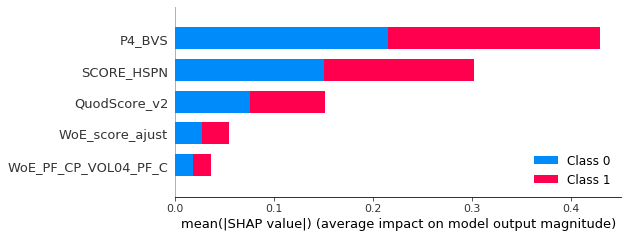

In [0]:
shap_values = shap.TreeExplainer(modelo_lgbm).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

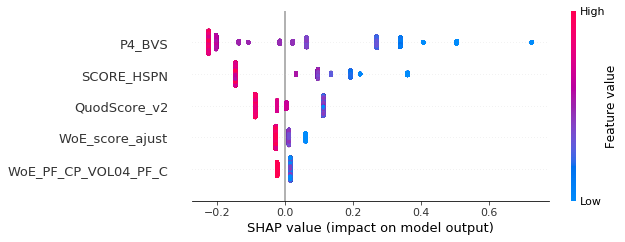

In [0]:
shap.summary_plot(shap_values[1],X_train)

In [0]:
cols = restrito
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_lgbm, X_train, X_test, y_train, y_test, target, nscores=cols, restrito=restrito, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_lgbm_restrito,WoE_score_ajust,WoE_PF_CP_VOL04_PF_C,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_lgbm_restrito,,,,,,
0,6.119847,3.360569,3.532338,5.273672,5.143592,5.642105
1,4.016913,2.491294,2.059696,3.775039,4.017678,2.984410
2,3.257953,1.993194,1.829787,2.738654,3.401361,4.114053
3,2.630576,1.927083,NaN,2.446483,2.861623,2.795618
4,2.109228,1.797637,NaN,2.450593,1.710794,1.715794
5,1.694215,NaN,NaN,1.678952,1.934652,2.550800
6,1.090750,NaN,NaN,1.903114,1.609395,1.494886
7,1.381610,NaN,NaN,1.271186,1.268691,1.455207
8,0.963391,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto

In [0]:
prefixo = "lgbm_aberto"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto, y, train_size=.7, random_state=1109)

modelo_lgbm, df_resultados, melhoria = encontra_modelo(classificador="light_gbm", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 4608 candidates, totalling 46080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 7.8s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 20.8s
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 40.6s
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 1.0min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 1.4min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 1.9min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 2.4min
[Parallel(n_jobs=-1)]: Done 3986 tasks | elapsed: 3.2min
[Parallel(n_jobs=-1)]: Done 4936 tasks | elapsed: 3.9min
[Parallel(n_jobs=-1)]: Done 5986 tasks | elapsed: 4.6min
[Parallel(n_jobs=-1)]: Done 7136 tasks | elapsed: 5.8min
[Parallel(n_jobs=-1)]: Done 8386 tasks | elapsed: 6.6min
[Parallel(n_jobs=-1)]: Done 9736 tasks | elapsed: 7.8min
[Parallel(n_jobs=-1)]: Done 11186 tasks | elapsed: 8.9min
[Parallel(n_jobs=-1)]: Done 12736 tasks | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 14386 tasks | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 16136 tasks | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 17986 tasks | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 19936 tasks | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 21986 tasks | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 24136 tasks | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 26386 tasks | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 28736 tasks | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 31186 tasks | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 33736 tasks | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 36386 tasks | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 39136 tasks | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 41986 tasks | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 44936 tasks | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 46080 out of 46080 | elapsed: 36.9min finished
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[1]	valid_0's auc: 0.648941
[2]	valid_0's auc: 0.699727
[3]	valid_0's auc: 0.707789
[4]	valid_0's auc: 0.71588
[5]	valid_0's auc: 0.72188
[6]	valid_0's auc: 0.723378
[7]	valid_0's auc: 0.724457
[8]	valid_0's auc: 0.726661
[9]	valid_0's auc: 0.726641
[10]	valid_0's auc: 0.727929
[11]	valid_0's auc: 0.726545
[12]	valid_0's auc: 0.727043
[13]	valid_0's auc: 0.725814
[14]	valid_0's auc: 0.723465
[15]	valid_0's auc: 0.723327
[16]	valid_0's auc: 0.725369
[17]	valid_0's auc: 0.727914
[18]	valid_0's auc: 0.726996
[19]	valid_0's auc: 0.726635
[20]	valid_0's auc: 0.72673
[21]	valid_0's auc: 0.727647
[22]	valid_0's auc: 0.727169
[23]	valid_0's auc: 0.727029
[24]	valid_0's auc: 0.72791
[25]	valid_0's auc: 0.726963
[26]	valid_0's auc: 0.725863
[27]	valid_0's auc: 0.725494
[28]	valid_0's auc: 0.723253
[29]	valid_0's auc: 0.725481
[30]	valid_0's auc: 0.726445
[31]	valid_0's auc: 0.725592
[32]	valid_0's auc: 0.725937
[33]	valid_0's auc: 0.725531
[34]	valid_0's auc: 0.724618
[35]	valid_0's auc: 0.726348
[36]	valid_0's auc: 0.724424
[37]	valid_0's auc: 0.724062
[38]	valid_0's auc: 0.723991
[39]	valid_0's auc: 0.722708
[40]	valid_0's auc: 0.723225
[41]	valid_0's auc: 0.723421
[42]	valid_0's auc: 0.722916
[43]	valid_0's auc: 0.723759
[44]	valid_0's auc: 0.722898
[45]	valid_0's auc: 0.72168
[46]	valid_0's auc: 0.720345
[47]	valid_0's auc: 0.720258
[48]	valid_0's auc: 0.718902
[49]	valid_0's auc: 0.717411
[50]	valid_0's auc: 0.716021
Aumento na acurácia de 0.00%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(X_train[aberto])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(temp_test[aberto])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (33.88520865192761, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (34.24773312078509, 22809, 2.398176158533912, 22262, 547)

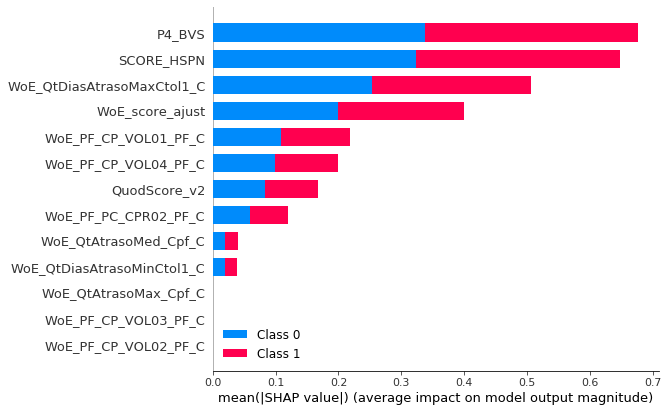

In [0]:
shap_values = shap.TreeExplainer(modelo_lgbm).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

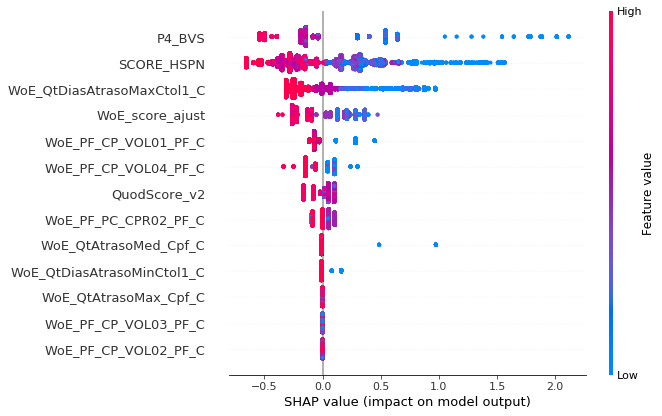

In [0]:
shap.summary_plot(shap_values[1],X_train)

In [0]:
cols = aberto
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_lgbm, X_train, X_test, y_train, y_test, target, nscores=cols, aberto=aberto, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_lgbm_aberto,WoE_PF_CP_VOL04_PF_C,WoE_PF_CP_VOL02_PF_C,WoE_PF_CP_VOL01_PF_C,WoE_PF_CP_VOL03_PF_C,WoE_PF_PC_CPR02_PF_C,WoE_QtDiasAtrasoMaxCtol1_C,WoE_QtAtrasoMed_Cpf_C,WoE_QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,WoE_score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_lgbm_aberto,,,,,,,,,,,,,,
0.0,6.224066,3.532338,3.894885,3.625507,3.476017,3.888175,3.345150,3.824410,3.915011,2.477448,3.360569,5.273672,5.143592,5.642105
1.0,5.305948,2.059696,2.730592,2.428571,2.582626,2.543123,1.692965,2.840746,2.569503,NaN,2.491294,3.775039,4.017678,2.984410
2.0,2.768730,1.829787,1.871827,1.984127,1.829047,2.024880,NaN,1.792246,2.029643,NaN,1.993194,2.738654,3.401361,4.114053
3.0,2.787879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970084,NaN,1.927083,2.446483,2.861623,2.795618
4.0,2.281211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797637,2.450593,1.710794,1.715794
5.0,2.121914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.678952,1.934652,2.550800
6.0,1.422671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.903114,1.609395,1.494886
7.0,0.918964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271186,1.268691,1.455207
8.0,0.284360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto Contínuo

In [0]:
prefixo = "lgbm_aberto_continuo"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto_continuo, y, train_size=.7, random_state=1109)

modelo_lgbm, df_resultados, melhoria = encontra_modelo(classificador="light_gbm", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 4608 candidates, totalling 46080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 13.5s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 34.8s
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 1.2min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 1.8min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 2.4min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 3.2min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 4.1min
[Parallel(n_jobs=-1)]: Done 3986 tasks | elapsed: 5.4min
[Parallel(n_jobs=-1)]: Done 4936 tasks | elapsed: 6.5min
[Parallel(n_jobs=-1)]: Done 5986 tasks | elapsed: 7.8min
[Parallel(n_jobs=-1)]: Done 7136 tasks | elapsed: 9.4min
[Parallel(n_jobs=-1)]: Done 8386 tasks | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 9736 tasks | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 11186 tasks | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 12736 tasks | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 14386 tasks | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 16136 tasks | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 17986 tasks | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 19936 tasks | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 21986 tasks | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 24136 tasks | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 26386 tasks | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done 28736 tasks | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 31186 tasks | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 33736 tasks | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 36386 tasks | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 39136 tasks | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 41986 tasks | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 44936 tasks | elapsed: 55.0min
[Parallel(n_jobs=-1)]: Done 46080 out of 46080 | elapsed: 56.3min finished
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[1]	valid_0's auc: 0.635821
[2]	valid_0's auc: 0.657902
[3]	valid_0's auc: 0.681841
[4]	valid_0's auc: 0.697684
[5]	valid_0's auc: 0.696531
[6]	valid_0's auc: 0.69124
[7]	valid_0's auc: 0.692715
[8]	valid_0's auc: 0.703735
[9]	valid_0's auc: 0.713363
[10]	valid_0's auc: 0.718895
[11]	valid_0's auc: 0.718337
[12]	valid_0's auc: 0.718378
[13]	valid_0's auc: 0.721118
[14]	valid_0's auc: 0.725479
[15]	valid_0's auc: 0.723195
[16]	valid_0's auc: 0.723899
[17]	valid_0's auc: 0.725874
[18]	valid_0's auc: 0.728195
[19]	valid_0's auc: 0.725131
[20]	valid_0's auc: 0.726586
[21]	valid_0's auc: 0.729869
[22]	valid_0's auc: 0.728983
[23]	valid_0's auc: 0.728262
[24]	valid_0's auc: 0.729039
[25]	valid_0's auc: 0.729226
[26]	valid_0's auc: 0.72807
[27]	valid_0's auc: 0.729653
[28]	valid_0's auc: 0.729179
[29]	valid_0's auc: 0.730796
[30]	valid_0's auc: 0.730131
[31]	valid_0's auc: 0.730533
[32]	valid_0's auc: 0.729967
[33]	valid_0's auc: 0.731363
[34]	valid_0's auc: 0.730334
[35]	valid_0's auc: 0.728536
[36]	valid_0's auc: 0.729469
[37]	valid_0's auc: 0.729701
[38]	valid_0's auc: 0.730732
[39]	valid_0's auc: 0.729613
[40]	valid_0's auc: 0.728744
[41]	valid_0's auc: 0.72961
[42]	valid_0's auc: 0.730881
[43]	valid_0's auc: 0.729924
[44]	valid_0's auc: 0.730099
[45]	valid_0's auc: 0.731219
[46]	valid_0's auc: 0.731076
[47]	valid_0's auc: 0.729447
[48]	valid_0's auc: 0.729855
[49]	valid_0's auc: 0.728969
[50]	valid_0's auc: 0.728701
[51]	valid_0's auc: 0.730793
[52]	valid_0's auc: 0.73161
[53]	valid_0's auc: 0.73063
[54]	valid_0's auc: 0.730388
[55]	valid_0's auc: 0.730253
[56]	valid_0's auc: 0.732629
[57]	valid_0's auc: 0.730369
[58]	valid_0

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(X_train[aberto_continuo])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_lgbm.predict_proba(temp_test[aberto_continuo])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (36.23205738580583, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (34.8167255931809, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = aberto_continuo
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_lgbm, X_train, X_test, y_train, y_test, target, nscores=cols, continuo=aberto_continuo, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_lgbm_aberto_continuo,PP_PD_VPG01_PF_C,PP_PD_CPG01_PF_C,PP_HA_AMP01_PF,GC_AV_GRV01_PF,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,PP_AV_GRV04_PF,PP_HA_AMP02_PF,PF_CP_VOL02_PF,PF_CP_VOL01_PF,PP_PD_CPG02_PF,PF_CP_VOL03_PF,PP_AV_AMP02_PF,PP_HA_VLR02_PF,PP_AV_GRV02_PF,PF_PC_CPR02_PF,RM_PR_MOD04_PF,QtMesesEmprego,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,QtDiasAtrasoMaxCtol1_C,QtAtrasoMed_Cpf_C,QtAtrasoMax_Cpf_C,QtDiasAtrasoMinCtol1_C,score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_lgbm_aberto_continuo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.468125,1.950806,1.991626,1.701606,1.931562,1.916848,3.672710,1.991839,1.583415,4.189189,3.472222,4.237678,3.789279,2.037012,2.142007,1.987206,3.844351,3.431764,2.507699,2.358153,2.295319,2.295319,2.477555,1.952653,2.005246,1.998473,2.477448,3.568161,5.273672,5.143592,5.642105
1,4.807692,3.166133,3.248464,2.276278,1.723077,3.492106,3.362915,2.053571,2.056807,2.683363,3.004096,2.395741,2.431337,3.177157,2.176643,3.167421,2.858482,2.123008,2.866158,5.724726,1.348315,1.925926,NaN,4.509429,3.494802,2.569503,NaN,3.299492,3.775039,4.017678,2.984410
2,3.467742,5.237561,4.715202,2.574782,2.494331,4.063604,2.275831,3.751737,2.417582,2.667313,2.917046,3.057156,2.454545,2.254902,2.735043,2.989130,2.732747,3.645833,2.579979,NaN,1.392515,1.408451,NaN,8.061002,4.822505,3.354002,NaN,3.458980,2.738654,3.401361,4.114053
3,2.406199,NaN,4.063604,2.580828,2.450166,NaN,2.104340,3.194103,2.130087,2.897196,1.800991,2.506964,2.590194,4.038997,2.740341,2.853067,2.639964,0.000000,2.374921,NaN,1.452282,1.745936,NaN,NaN,NaN,5.211726,NaN,2.190780,2.446483,2.861623,2.795618
4,2.500000,NaN,NaN,3.501281,2.952202,NaN,1.887661,4.130053,2.296820,2.262837,2.671416,1.886792,1.530823,NaN,2.687225,4.275862,1.919232,NaN,2.363074,NaN,1.771824,2.448525,NaN,NaN,NaN,NaN,NaN,2.838710,2.450593,1.710794,1.715794
5,1.684042,NaN,NaN,2.870323,3.600514,NaN,1.504388,NaN,3.003138,1.859862,1.512532,2.000851,1.595968,NaN,4.072189,NaN,2.024880,NaN,2.979971,NaN,2.936170,1.915542,NaN,NaN,NaN,NaN,NaN,1.940110,1.678952,1.934652,2.550800
6,1.528926,NaN,NaN,4.432538,3.885210,NaN,1.698426,NaN,3.563374,1.508972,2.387153,1.780287,2.079073,NaN,2.098659,NaN,4.166667,NaN,2.204802,NaN,2.547771,2.855711,NaN,NaN,NaN,NaN,NaN,2.111024,1.903114,1.609395,1.494886
7,0.948938,NaN,NaN,NaN,NaN,NaN,2.086957,NaN,3.082395,1.972140,1.815931,1.743939,3.504548,NaN,0.000000,NaN,NaN,NaN,2.316076,NaN,3.580455,3.300790,NaN,NaN,NaN,NaN,NaN,1.677540,1.271186,1.268691,1.455207
8,0.453309,NaN,NaN,NaN,NaN,NaN,3.642286,NaN,4.166667,4.339623,2.133437,2.053064,0.000000,NaN,NaN,NaN,NaN,NaN,2.048417,NaN,4.863636,5.000000,NaN,NaN,NaN,NaN,NaN,2.063323,1.165872,1.023392,0.772947


### Random Forest

#### Restrito

In [0]:
prefixo = "rf_restrito"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_restrito, y, train_size=.7, random_state=1109)

modelo_rf, df_resultados, melhoria = encontra_modelo(classificador="random_forest", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 48.3s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 2.3min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 4.7min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 8.5min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 28.3min finished
Aumento na acurácia de 0.00%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_rf.predict_proba(X_train[restrito])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_rf.predict_proba(temp_test[restrito])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (28.946942195273195, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (31.112936728083064, 22809, 2.398176158533912, 22262, 547)

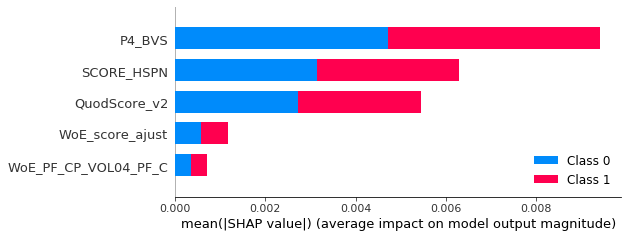

In [0]:
shap_values = shap.TreeExplainer(modelo_rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

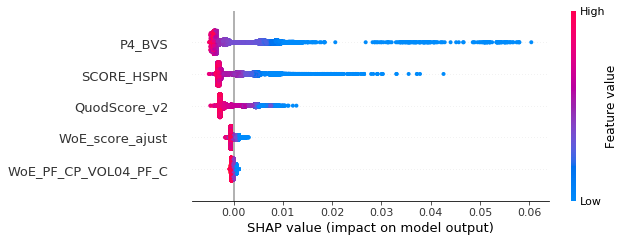

In [0]:
shap.summary_plot(shap_values[1],X_train)

In [0]:
cols = restrito
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_rf, X_train, X_test, y_train, y_test, target, nscores=cols, restrito=restrito, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_rf_restrito,WoE_score_ajust,WoE_PF_CP_VOL04_PF_C,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_rf_restrito,,,,,,
0.0,6.395094,3.360569,3.532338,5.273672,5.143592,5.642105
1.0,3.968903,2.491294,2.059696,3.775039,4.017678,2.984410
2.0,3.072838,1.993194,1.829787,2.738654,3.401361,4.114053
3.0,2.505695,1.927083,NaN,2.446483,2.861623,2.795618
4.0,2.541048,1.797637,NaN,2.450593,1.710794,1.715794
5.0,1.469279,NaN,NaN,1.678952,1.934652,2.550800
6.0,1.199338,NaN,NaN,1.903114,1.609395,1.494886
7.0,1.675198,NaN,NaN,1.271186,1.268691,1.455207
8.0,0.795756,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto

In [0]:
prefixo = "rf_aberto"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto, y, train_size=.7, random_state=1109)

modelo_rf, df_resultados, melhoria = encontra_modelo(classificador="random_forest", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 36.1s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 1.8min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 3.6min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 6.4min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 20.3min finished
Aumento na acurácia de -0.01%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_rf.predict_proba(X_train[aberto])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_rf.predict_proba(temp_test[aberto])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (33.002581011547704, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (35.73843131580577, 22809, 2.398176158533912, 22262, 547)

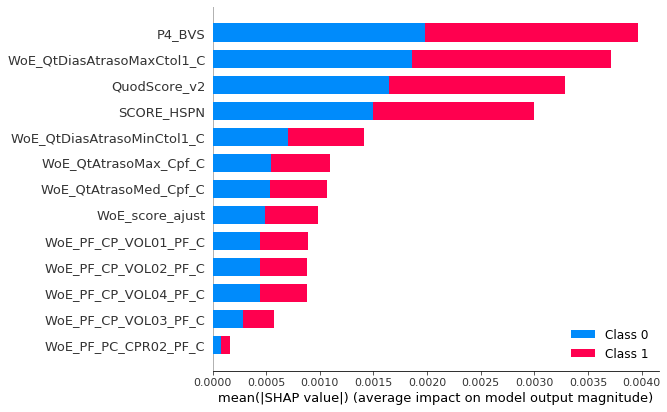

In [0]:
shap_values = shap.TreeExplainer(modelo_rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

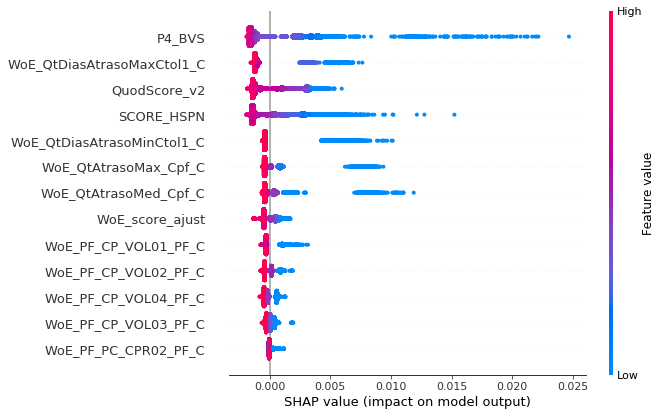

In [0]:
shap.summary_plot(shap_values[1],X_train)

In [0]:
cols = aberto
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_rf, X_train, X_test, y_train, y_test, target, nscores=cols, aberto=aberto, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_rf_aberto,WoE_PF_CP_VOL04_PF_C,WoE_PF_CP_VOL02_PF_C,WoE_PF_CP_VOL01_PF_C,WoE_PF_CP_VOL03_PF_C,WoE_PF_PC_CPR02_PF_C,WoE_QtDiasAtrasoMaxCtol1_C,WoE_QtAtrasoMed_Cpf_C,WoE_QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,WoE_score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_rf_aberto,,,,,,,,,,,,,,
0,6.707897,3.532338,3.894885,3.625507,3.476017,3.888175,3.345150,3.824410,3.915011,2.477448,3.360569,5.273672,5.143592,5.642105
1,4.971653,2.059696,2.730592,2.428571,2.582626,2.543123,1.692965,2.840746,2.569503,NaN,2.491294,3.775039,4.017678,2.984410
2,3.767993,1.829787,1.871827,1.984127,1.829047,2.024880,NaN,1.792246,2.029643,NaN,1.993194,2.738654,3.401361,4.114053
3,2.565114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970084,NaN,1.927083,2.446483,2.861623,2.795618
4,2.284166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797637,2.450593,1.710794,1.715794
5,1.409002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.678952,1.934652,2.550800
6,1.359053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.903114,1.609395,1.494886
7,0.827967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271186,1.268691,1.455207
8,0.670177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto Contínuo

In [0]:
prefixo = "rf_aberto_continuo"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto_continuo, y, train_size=.7, random_state=1109)

modelo_rf, df_resultados, melhoria = encontra_modelo(classificador="random_forest", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 43.3s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 2.0min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 4.1min
[Parallel(n_jobs=-1)]: Done 1186 tasks | elapsed: 7.3min
[Parallel(n_jobs=-1)]: Done 1736 tasks | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 2386 tasks | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 3136 tasks | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 24.8min finished
Aumento na acurácia de -0.01%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_rf.predict_proba(X_train[aberto_continuo])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_rf.predict_proba(temp_test[aberto_continuo])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (33.19682855181951, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (34.671685397945716, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = aberto_continuo
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_rf, X_train, X_test, y_train, y_test, target, nscores=cols, continuo=aberto_continuo, prefixo=prefixo, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_rf_aberto_continuo,PP_PD_VPG01_PF_C,PP_PD_CPG01_PF_C,PP_HA_AMP01_PF,GC_AV_GRV01_PF,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,PP_AV_GRV04_PF,PP_HA_AMP02_PF,PF_CP_VOL02_PF,PF_CP_VOL01_PF,PP_PD_CPG02_PF,PF_CP_VOL03_PF,PP_AV_AMP02_PF,PP_HA_VLR02_PF,PP_AV_GRV02_PF,PF_PC_CPR02_PF,RM_PR_MOD04_PF,QtMesesEmprego,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,QtDiasAtrasoMaxCtol1_C,QtAtrasoMed_Cpf_C,QtAtrasoMax_Cpf_C,QtDiasAtrasoMinCtol1_C,score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_rf_aberto_continuo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.381934,1.950806,1.991626,1.701606,1.931562,1.916848,3.672710,1.991839,1.583415,4.189189,3.472222,4.237678,3.789279,2.037012,2.142007,1.987206,3.844351,3.431764,2.507699,2.358153,2.295319,2.295319,2.477555,1.952653,2.005246,1.998473,2.477448,3.568161,5.273672,5.143592,5.642105
1,5.350719,3.166133,3.248464,2.276278,1.723077,3.492106,3.362915,2.053571,2.056807,2.683363,3.004096,2.395741,2.431337,3.177157,2.176643,3.167421,2.858482,2.123008,2.866158,5.724726,1.348315,1.925926,NaN,4.509429,3.494802,2.569503,NaN,3.299492,3.775039,4.017678,2.984410
2,3.204047,5.237561,4.715202,2.574782,2.494331,4.063604,2.275831,3.751737,2.417582,2.667313,2.917046,3.057156,2.454545,2.254902,2.735043,2.989130,2.732747,3.645833,2.579979,NaN,1.392515,1.408451,NaN,8.061002,4.822505,3.354002,NaN,3.458980,2.738654,3.401361,4.114053
3,3.344209,NaN,4.063604,2.580828,2.450166,NaN,2.104340,3.194103,2.130087,2.897196,1.800991,2.506964,2.590194,4.038997,2.740341,2.853067,2.639964,0.000000,2.374921,NaN,1.452282,1.745936,NaN,NaN,NaN,5.211726,NaN,2.190780,2.446483,2.861623,2.795618
4,2.204724,NaN,NaN,3.501281,2.952202,NaN,1.887661,4.130053,2.296820,2.262837,2.671416,1.886792,1.530823,NaN,2.687225,4.275862,1.919232,NaN,2.363074,NaN,1.771824,2.448525,NaN,NaN,NaN,NaN,NaN,2.838710,2.450593,1.710794,1.715794
5,1.701094,NaN,NaN,2.870323,3.600514,NaN,1.504388,NaN,3.003138,1.859862,1.512532,2.000851,1.595968,NaN,4.072189,NaN,2.024880,NaN,2.979971,NaN,2.936170,1.915542,NaN,NaN,NaN,NaN,NaN,1.940110,1.678952,1.934652,2.550800
6,1.099366,NaN,NaN,4.432538,3.885210,NaN,1.698426,NaN,3.563374,1.508972,2.387153,1.780287,2.079073,NaN,2.098659,NaN,4.166667,NaN,2.204802,NaN,2.547771,2.855711,NaN,NaN,NaN,NaN,NaN,2.111024,1.903114,1.609395,1.494886
7,1.009215,NaN,NaN,NaN,NaN,NaN,2.086957,NaN,3.082395,1.972140,1.815931,1.743939,3.504548,NaN,0.000000,NaN,NaN,NaN,2.316076,NaN,3.580455,3.300790,NaN,NaN,NaN,NaN,NaN,1.677540,1.271186,1.268691,1.455207
8,0.642202,NaN,NaN,NaN,NaN,NaN,3.642286,NaN,4.166667,4.339623,2.133437,2.053064,0.000000,NaN,NaN,NaN,NaN,NaN,2.048417,NaN,4.863636,5.000000,NaN,NaN,NaN,NaN,NaN,2.063323,1.165872,1.023392,0.772947


### XgBoost

#### Restrito

In [0]:
prefixo = "xg_restrito"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_restrito, y, train_size=.7, random_state=1109)

modelo_xg, df_resultados, melhoria = encontra_modelo(classificador="xgboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 16.9s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 48.1s
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 1.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 1.9min finished
Aumento na acurácia de 0.02%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_xg.predict_proba(X_train[restrito])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_xg.predict_proba(temp_test[restrito])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (36.22617466585005, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (30.695874311855633, 22809, 2.398176158533912, 22262, 547)

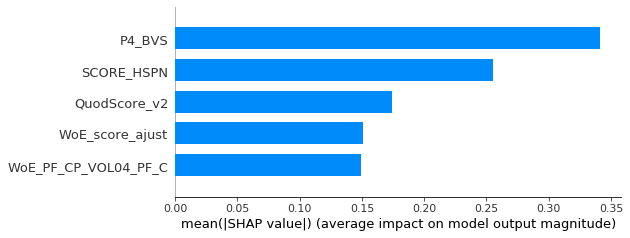

In [0]:
shap_values = shap.TreeExplainer(modelo_xg).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

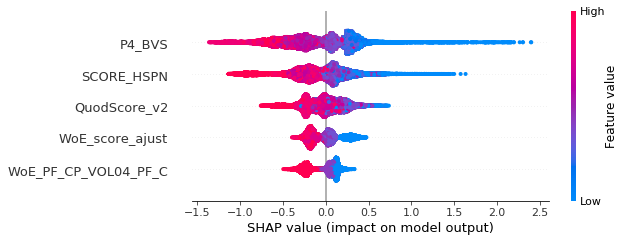

In [0]:
shap.summary_plot(shap_values,X_train)

In [0]:
cols = restrito
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_xg, X_train, X_test, y_train, y_test, target, nscores=cols, restrito=restrito, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_xg_restrito,WoE_score_ajust,WoE_PF_CP_VOL04_PF_C,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_xg_restrito,,,,,,
0,5.545927,3.360569,3.532338,5.273672,5.143592,5.642105
1,4.145299,2.491294,2.059696,3.775039,4.017678,2.984410
2,3.389121,1.993194,1.829787,2.738654,3.401361,4.114053
3,2.887242,1.927083,NaN,2.446483,2.861623,2.795618
4,2.425763,1.797637,NaN,2.450593,1.710794,1.715794
5,1.525144,NaN,NaN,1.678952,1.934652,2.550800
6,1.582015,NaN,NaN,1.903114,1.609395,1.494886
7,1.508169,NaN,NaN,1.271186,1.268691,1.455207
8,0.843882,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto

In [0]:
prefixo = "xg_aberto"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto, y, train_size=.7, random_state=1109)

# hiperparams = {}

modelo_xg, df_resultados, melhoria = encontra_modelo(classificador="xgboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 24.9s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 1.2min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 2.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 3.0min finished
Aumento na acurácia de 0.01%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_xg.predict_proba(X_train[aberto])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_xg.predict_proba(temp_test[aberto])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (46.995623612881374, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (33.38158152117947, 22809, 2.398176158533912, 22262, 547)

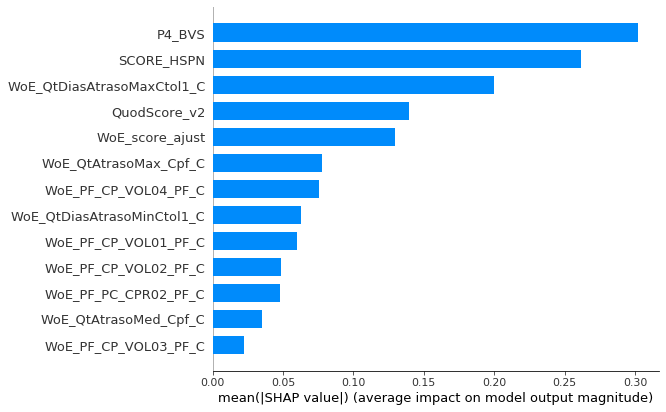

In [0]:
shap_values = shap.TreeExplainer(modelo_xg).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

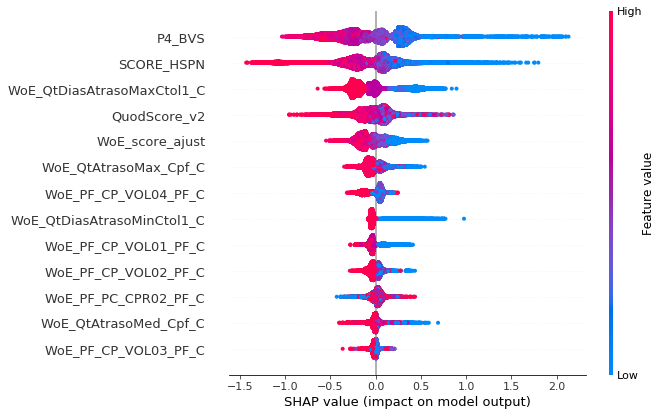

In [0]:
shap.summary_plot(shap_values,X_train)

In [0]:
cols = aberto
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_xg, X_train, X_test, y_train, y_test, target, nscores=cols, aberto=aberto, prefixo=prefixo, safras=safras_dev, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_xg_aberto,WoE_PF_CP_VOL04_PF_C,WoE_PF_CP_VOL02_PF_C,WoE_PF_CP_VOL01_PF_C,WoE_PF_CP_VOL03_PF_C,WoE_PF_PC_CPR02_PF_C,WoE_QtDiasAtrasoMaxCtol1_C,WoE_QtAtrasoMed_Cpf_C,WoE_QtAtrasoMax_Cpf_C,WoE_QtDiasAtrasoMinCtol1_C,WoE_score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_xg_aberto,,,,,,,,,,,,,,
0.0,6.721536,3.532338,3.894885,3.625507,3.476017,3.888175,3.345150,3.824410,3.915011,2.477448,3.360569,5.273672,5.143592,5.642105
1.0,3.937008,2.059696,2.730592,2.428571,2.582626,2.543123,1.692965,2.840746,2.569503,NaN,2.491294,3.775039,4.017678,2.984410
2.0,3.668977,1.829787,1.871827,1.984127,1.829047,2.024880,NaN,1.792246,2.029643,NaN,1.993194,2.738654,3.401361,4.114053
3.0,3.348681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970084,NaN,1.927083,2.446483,2.861623,2.795618
4.0,2.121583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.797637,2.450593,1.710794,1.715794
5.0,1.411765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.678952,1.934652,2.550800
6.0,1.502233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.903114,1.609395,1.494886
7.0,0.844444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271186,1.268691,1.455207
8.0,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165872,1.023392,0.772947


#### Aberto Contínuo

In [0]:
prefixo = "xg_aberto_continuo"
prefixos.append(prefixo)

X_train, X_test, y_train, y_test = train_test_split(X_aberto_continuo, y, train_size=.7, random_state=1109)

modelo_xg, df_resultados, melhoria = encontra_modelo(classificador="xgboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_divisoes=5, n_repeticoes=2)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks | elapsed: 55.9s
[Parallel(n_jobs=-1)]: Done 386 tasks | elapsed: 2.8min
[Parallel(n_jobs=-1)]: Done 736 tasks | elapsed: 6.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 6.8min finished
Aumento na acurácia de 0.05%

In [0]:
target = 'inad30'

temp_train=X_train.join(y_train,rsuffix='r')
temp_train[f'yhat_{prefixo}']=modelo_xg.predict_proba(X_train[aberto_continuo])[:,1]
print("KS treino: " , calc_perf(temp_train,f'yhat_{prefixo}', target))
  
temp_test=X_test.join(y_test,rsuffix='r')
temp_test[f'yhat_{prefixo}']=modelo_xg.predict_proba(temp_test[aberto_continuo])[:,1]
print("KS teste: " , calc_perf(temp_test,f'yhat_{prefixo}', target))

KS treino: (33.19682855181951, 53218, 2.2699086775151263, 52010, 1208)
KS teste: (34.671685397945716, 22809, 2.398176158533912, 22262, 547)

In [0]:
cols = aberto_continuo
scores = [f"yhat_{prefixo}", *cols]

tab_KS = calcula_KS(modelo_xg, X_train, X_test, y_train, y_test, target, nscores=cols, continuo=aberto_continuo, prefixo=prefixo, base_pd=base_cli_pd, base_cat=base_cli_cat)
tab_KS

vis.tabela_qs(safras_dev, "Safra_main", scores)
vis.tabela_qs(safras_nov, "Safra_main", scores)

col_0,yhat_xg_aberto_continuo,PP_PD_VPG01_PF_C,PP_PD_CPG01_PF_C,PP_HA_AMP01_PF,GC_AV_GRV01_PF,PF_CP_VOL04_PF_C,PF_CP_VOL04_PF,PP_AV_GRV04_PF,PP_HA_AMP02_PF,PF_CP_VOL02_PF,PF_CP_VOL01_PF,PP_PD_CPG02_PF,PF_CP_VOL03_PF,PP_AV_AMP02_PF,PP_HA_VLR02_PF,PP_AV_GRV02_PF,PF_PC_CPR02_PF,RM_PR_MOD04_PF,QtMesesEmprego,QtDiasAtrasoMinCtol1,QtDiasAtrasoMedCtol1,QtDiasAtrasoMaxCtol1,QtAtrasoAtual_Cto1,QtDiasAtrasoMaxCtol1_C,QtAtrasoMed_Cpf_C,QtAtrasoMax_Cpf_C,QtDiasAtrasoMinCtol1_C,score_ajust,P4_BVS,QuodScore_v2,SCORE_HSPN
qsyhat_xg_aberto_continuo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,6.229508,1.950806,1.991626,1.701606,1.931562,1.916848,3.672710,1.991839,1.583415,4.189189,3.472222,4.237678,3.789279,2.037012,2.142007,1.987206,3.844351,3.431764,2.507699,2.358153,2.295319,2.295319,2.477555,1.952653,2.005246,1.998473,2.477448,3.568161,5.273672,5.143592,5.642105
1.0,4.272767,3.166133,3.248464,2.276278,1.723077,3.492106,3.362915,2.053571,2.056807,2.683363,3.004096,2.395741,2.431337,3.177157,2.176643,3.167421,2.858482,2.123008,2.866158,5.724726,1.348315,1.925926,NaN,4.509429,3.494802,2.569503,NaN,3.299492,3.775039,4.017678,2.984410
2.0,3.954565,5.237561,4.715202,2.574782,2.494331,4.063604,2.275831,3.751737,2.417582,2.667313,2.917046,3.057156,2.454545,2.254902,2.735043,2.989130,2.732747,3.645833,2.579979,NaN,1.392515,1.408451,NaN,8.061002,4.822505,3.354002,NaN,3.458980,2.738654,3.401361,4.114053
3.0,2.663337,NaN,4.063604,2.580828,2.450166,NaN,2.104340,3.194103,2.130087,2.897196,1.800991,2.506964,2.590194,4.038997,2.740341,2.853067,2.639964,0.000000,2.374921,NaN,1.452282,1.745936,NaN,NaN,NaN,5.211726,NaN,2.190780,2.446483,2.861623,2.795618
4.0,2.404238,NaN,NaN,3.501281,2.952202,NaN,1.887661,4.130053,2.296820,2.262837,2.671416,1.886792,1.530823,NaN,2.687225,4.275862,1.919232,NaN,2.363074,NaN,1.771824,2.448525,NaN,NaN,NaN,NaN,NaN,2.838710,2.450593,1.710794,1.715794
5.0,1.944559,NaN,NaN,2.870323,3.600514,NaN,1.504388,NaN,3.003138,1.859862,1.512532,2.000851,1.595968,NaN,4.072189,NaN,2.024880,NaN,2.979971,NaN,2.936170,1.915542,NaN,NaN,NaN,NaN,NaN,1.940110,1.678952,1.934652,2.550800
6.0,1.230012,NaN,NaN,4.432538,3.885210,NaN,1.698426,NaN,3.563374,1.508972,2.387153,1.780287,2.079073,NaN,2.098659,NaN,4.166667,NaN,2.204802,NaN,2.547771,2.855711,NaN,NaN,NaN,NaN,NaN,2.111024,1.903114,1.609395,1.494886
7.0,1.159296,NaN,NaN,NaN,NaN,NaN,2.086957,NaN,3.082395,1.972140,1.815931,1.743939,3.504548,NaN,0.000000,NaN,NaN,NaN,2.316076,NaN,3.580455,3.300790,NaN,NaN,NaN,NaN,NaN,1.677540,1.271186,1.268691,1.455207
8.0,0.578807,NaN,NaN,NaN,NaN,NaN,3.642286,NaN,4.166667,4.339623,2.133437,2.053064,0.000000,NaN,NaN,NaN,NaN,NaN,2.048417,NaN,4.863636,5.000000,NaN,NaN,NaN,NaN,NaN,2.063323,1.165872,1.023392,0.772947


### Validação

In [0]:
target = 'inad30'
modelo_logistica = "yhat_blend"

cols0 = [f'yhat_{prefixo}' for prefixo in prefixos]
cols = [*cols0, modelo_logistica, 'P4_BVS','SCORE_HSPN','QuodScore_v2']
safras_ks = [safra for safra in pd.DatetimeIndex(base_cli_pd["Safra_main"].unique()) if safra.year < 2022 and safra.month <= 12]

vis.tabela_ks_por_safra(target, modelos=cols, safras=safras_ks)

modelo,P4_BVS,QuodScore_v2,SCORE_HSPN,yhat_ab_aberto,yhat_ab_aberto_continuo,yhat_ab_restrito,yhat_blend,yhat_lgbm_aberto,yhat_lgbm_aberto_continuo,yhat_lgbm_restrito,yhat_rf_aberto,yhat_rf_aberto_continuo,yhat_rf_restrito,yhat_xg_aberto,yhat_xg_aberto_continuo,yhat_xg_restrito
Safra,,,,,,,,,,,,,,,,
2021-08-01,25.9946,24.0504,22.3962,34.2453,40.0522,29.8874,35.0807,34.4071,36.2196,28.1120,35.0668,34.3381,28.1666,42.6158,48.5666,31.2928
2021-09-01,25.7289,22.5302,27.6280,34.6297,39.2380,35.1598,35.0790,34.1887,37.1392,31.4223,33.6587,32.5710,31.3492,42.1174,47.8939,36.2864
2021-10-01,26.3849,22.5623,23.2483,33.5001,39.6719,34.6808,32.4753,34.1573,34.8148,30.5408,33.3178,33.0891,30.6710,43.2131,48.1856,34.5645
2021-11-01,20.6358,24.9001,25.0481,32.3008,33.0057,26.7767,35.1546,29.6297,30.3918,27.1606,33.3550,33.1365,27.3304,32.4867,29.5363,26.5316
2021-12-01,19.2527,20.3842,19.8172,30.0522,29.4842,24.7710,30.3851,28.3978,27.6105,20.2444,30.2214,28.3750,21.8523,29.9875,27.3279,25.6042


### Gráficos

#### KS por safra

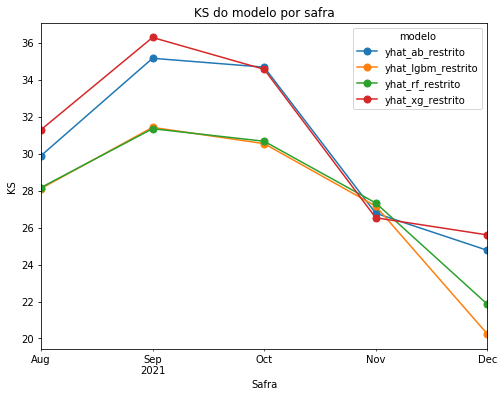

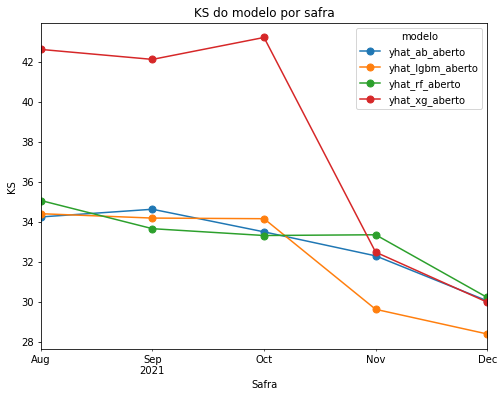

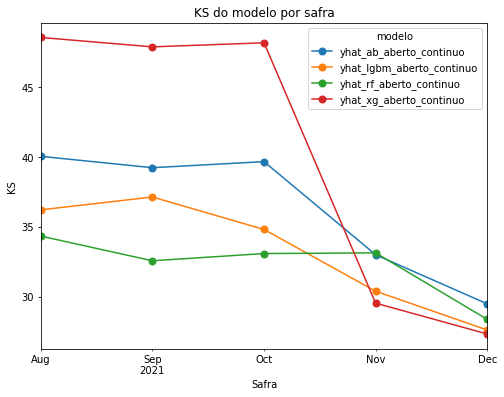

In [0]:
graficos = vis.ks_por_safra(cols, safras_dev)

In [0]:
restritos = [modelo for modelo in cols if "restrito" in modelo]
abertos = [modelo for modelo in cols if "aberto" in modelo and "continuo" not in modelo]
continuos = [modelo for modelo in cols if "continuo" in modelo]

restritos_blend = [modelo_logistica, *restritos]
abertos_blend = [modelo_logistica, *abertos]
continuos_blend = [modelo_logistica, *continuos]

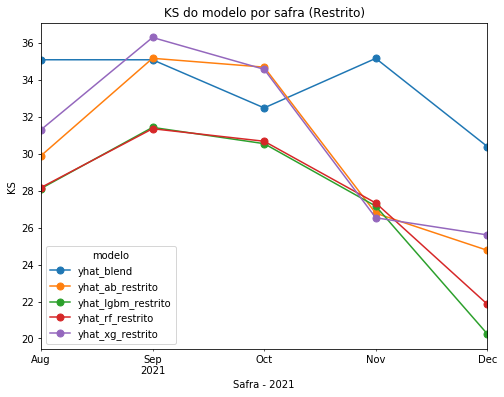

In [0]:
vis.tab_KS_pivot[restritos_blend].plot(kind="line", title="KS do modelo por safra (Restrito)", figsize=(8,6), marker='.', markersize=14)
plt.ylabel("KS")
plt.xlabel("Safra - 2021")

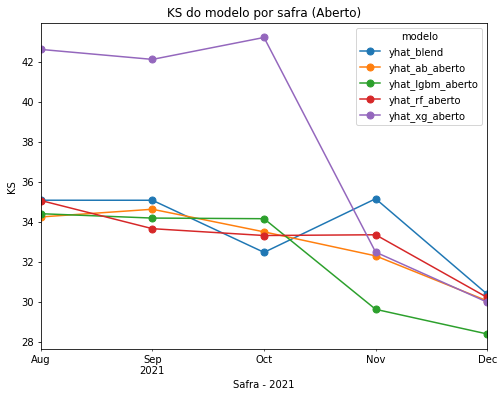

In [0]:
vis.tab_KS_pivot[abertos_blend].plot.line(title="KS do modelo por safra (Aberto)", figsize=(8,6), marker='.', markersize=14)
plt.ylabel("KS")
plt.xlabel("Safra - 2021")

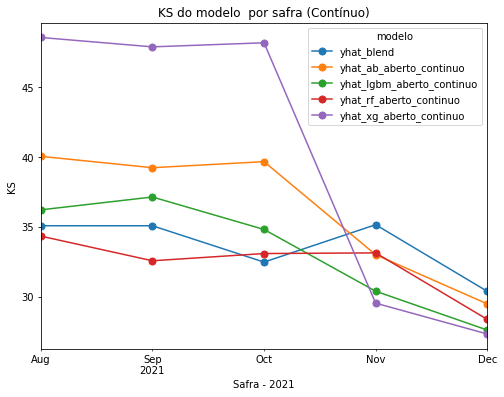

In [0]:
vis.tab_KS_pivot[continuos_blend].plot.line(title="KS do modelo  por safra (Contínuo)", figsize=(8,6), marker='.', markersize=14)
plt.ylabel("KS")
plt.xlabel("Safra - 2021")

#### Decis Inad

In [0]:
prefixos = list(dict.fromkeys(prefixos))
 
scores = [modelo_logistica, 'P4_BVS', 'SCORE_HSPN', 'QuodScore_v2']

tab_decis = vis.tabela_qs_final(prefixos, scores)
tab_decis

col_0,yhat_ab_restrito,yhat_ab_aberto,yhat_ab_aberto_continuo,yhat_lgbm_restrito,yhat_lgbm_aberto,yhat_lgbm_aberto_continuo,yhat_rf_restrito,yhat_rf_aberto,yhat_rf_aberto_continuo,yhat_xg_restrito,yhat_xg_aberto,yhat_xg_aberto_continuo,yhat_blend,P4_BVS,SCORE_HSPN,QuodScore_v2
qsyhat_ab_restrito,,,,,,,,,,,,,,,,
0,3.356996,4.542493,4.485274,4.280611,3.422455,3.915221,2.096989,3.604838,4.462156,2.624873,2.866309,4.968916,6.874493,4.682094,5.036211,4.078928
1,3.575077,3.346359,3.039056,2.970027,3.502654,2.927306,3.490034,2.258458,3.380733,3.120902,3.528123,2.519148,4.180010,3.007301,3.047748,3.035776
2,2.651015,2.393963,2.257876,2.231301,2.654247,2.038774,2.904631,2.376238,2.642108,2.551739,2.770556,2.060222,2.956593,2.586326,3.159263,2.454570
3,2.476827,1.894477,1.775223,1.599612,1.831524,1.951890,2.073403,2.287608,2.087028,2.150699,2.288949,1.656605,2.405470,1.951717,2.532811,2.064438
4,1.870572,1.371021,1.576355,1.255028,1.625298,1.859114,2.098069,1.890089,1.574552,2.078249,1.671512,1.422392,1.683609,1.693200,1.993384,1.673467
5,1.582128,1.194859,1.304646,1.696913,1.322626,1.386139,1.562119,1.360871,1.142155,1.429370,1.158730,1.146197,1.508741,1.278082,1.793533,1.515360
6,1.223679,1.091018,0.981932,1.221412,1.225528,1.153340,1.444418,1.213089,0.803213,1.093775,1.072555,0.793040,1.163069,1.357791,1.451850,1.290586
7,1.017979,0.828494,0.787840,1.166667,0.812012,0.710078,1.225531,0.731054,0.873197,1.072000,0.682483,0.694112,0.884671,0.973743,1.355932,0.927411
8,0.589821,0.594889,0.460683,0.841197,0.505830,0.637349,0.771100,0.705746,0.630166,0.702828,0.459054,0.519776,0.532831,0.780814,1.030489,1.009891


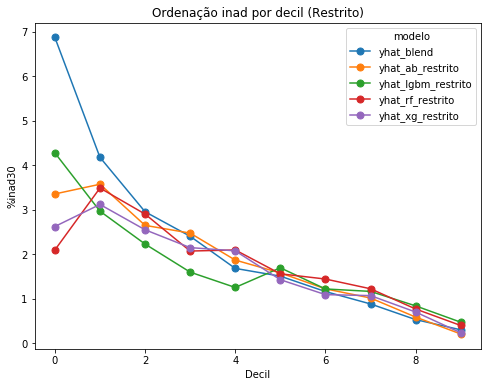

In [0]:
tab_decis[restritos_blend].plot(kind="line", title="Ordenação inad por decil (Restrito)", figsize=(8,6), marker='.', markersize=14 )
plt.xlabel("Decil")
plt.ylabel("%inad30")
plt.legend(title="modelo")

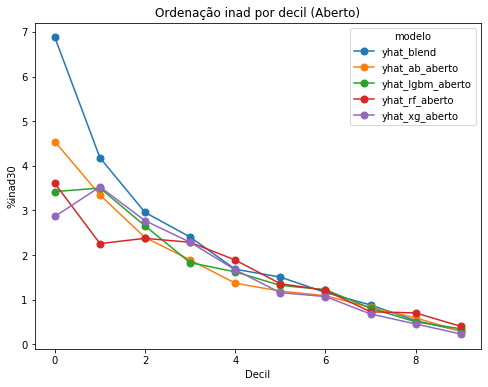

In [0]:
tab_decis[abertos_blend].plot(kind="line", title="Ordenação inad por decil (Aberto)", figsize=(8,6), marker='.', markersize=14 )
plt.xlabel("Decil")
plt.ylabel("%inad30")
plt.legend(title="modelo")

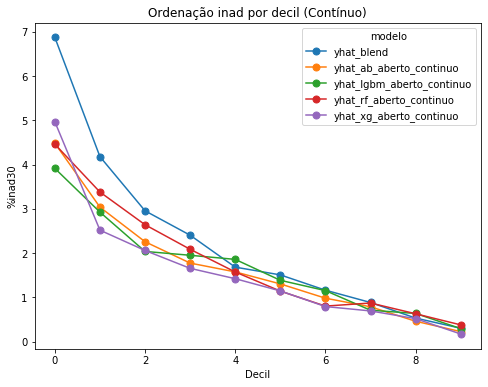

aplica_WoE(base2) | última atualização: 23/03/2022

In [0]:
tab_decis[continuos_blend].plot(kind="line", title="Ordenação inad por decil (Contínuo)", figsize=(8,6), marker='.', markersize=14 )
plt.xlabel("Decil")
plt.ylabel("%inad30")
plt.legend(title="modelo")